## Trabajo Final: Manejo de datos en Biología computacional. Herramientas de Estadistica

Se obtienen celulas aisladas obtenidas por la estandarizacion del modelo de Langendorff de corazon aisaldos. Disgregado el tejido, se expone al fluoroforo a las celulas aisladas para sensar entradas y salidas de Calcio al reticulo. Se observa en el microscopio y se realizan lecturas para obteer parametros cineticos, en la imagen obtenida observamos sparks que representan el flujo de Calcio. Se contabilizan los sparks y se miden diferentes parametros que encontraremos en la tabla.

B) Tiempo_maximo: tiempo en que ocurre la maxima intensidad

C) Intensidad_maxima: medida de la intensidad maxima del fluoroforo

D) Intensidad_minima: medida de la intensidad minima del fluoroforo

E) Tiempo_valle: tiempo en que tarda en llegar al minimo la intensidad del fluoroforo

F) Intensidad_valle: medida de la intensidad en el valle del fluoroforo

G) Sparks_amplitud: diferencia entre maximo y minimo de intensidad de fluoroforo

H) TTP: tiempo total al pico

I) Sparks_tiempo_pico50: lo que tarda en llegar a la mitad del pico cuando la intensidad esta en aumento, esta relacionado con la velocidad de salida de calcio (que tan rapido se abrieron canales)

J) Sp_tau (tau=kfold d idea de la velocidad de caida, de la velocidad de retorno en el que el Ca2+ vuelve al RE y no se puede leer)

K) TTP50 tiempo desde el pico hasta el 50% de la caida, pesa menos la liberacion y mas la incorporacion de Ca2+ tiempo que le toma bajar a la mitad

L) FullWidth: habla de la difusion del spark, cuanto se fue al costado o que reduce canales, habla del VOLUMEN de calcio que sale

M) (ΔF/F0)/ΔTmax: (amplitud)/(tiempo al pico)= velocidad de subida

N) FullDuration: duracion del spark

O) Width: largo de la onda de fluorescnecia

P) High: alto del pico de fluorescencia 

Q) Flag: si el evento correspode a un spark. 2 no corresponde, 1 si corresponde

Estos datos son obtenidos mediante un programa que registra informacion pero no la procesa, es decir da un valor sinimportar si tiene sentido dentro de la medida.

A partir de esta informacion obtenida para una imagen se analizaran diferentes datos estadisticos obtenidos. Para esto y considerando lo que representa el flag, los datos de cada columna se separaran en dos poblaciones:

+ poblacion 1 cuando el flag es 1 y la lectura corresponde a un spark

+ poblacion 2 cuando el flag es 2 y la lectura no corresponde a un spark


In [1]:
##IMPORTAR LA TABLA##

import pandas as pd #Biblioteca que voy a usar

#path = 'C:/Users/WINDOWS 8.1/Desktop/maca/trabajo_final_alga-aras/tabla_trabajo_final.csv' # Path de compu de escritorio
path = 'C:/Users/maca2/OneDrive/Documentos/Github/trabajo_final_alga-aras/tabla_trabajo_final.csv' # path de notebook
sparks_data_list= pd.read_csv(path,sep=',') #tabla incorporada como dataframe y el archivo original cada columna separada por coma
del sparks_data_list['Unnamed: 0'] #borrar la columna 0
sparks_data_list.head()#mostrar las primeras filas de la tabla

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


In [2]:
#Denomine df como la tabla que cargue para no editar la tabla original y ejecutar cambios en la copia de mi tabla
df=sparks_data_list
print(df) # da como resultado una tabla de 2397 rows x 16 columns cuando no le hice ningun tratamiento

      tiempo_maximo  intensidad_maxima  intensidad_minima  tiempo_valle   
0              13.0          10.925926           7.740741          23.0  \
1               4.0          10.941176           8.117647           7.0   
2               3.0           7.230769           6.884615           4.0   
3              15.0          10.363636           7.454545           0.0   
4              24.0          10.689655           7.931034          26.0   
...             ...                ...                ...           ...   
2392            9.0           5.241379           4.551724          13.0   
2393            8.0           5.526316           4.684211          10.0   
2394            3.0           5.700000           4.200000          10.0   
2395           18.0          29.888889          25.388889           2.0   
2396           22.0           6.268293           4.707317          23.0   

      intensidad_valle  sparks_amplitud   TTP  sparks_tiempo_pico50   
0             7.666667      

### Eliminacion de datos

Uno de los impedimentos al querer analizar estadisticamente los datos son los valores Nan o datos que no pueden ser reales o se alejan de los valores que deberiamos obtener de cada medida(llamamos medida a la lectura de cada spark y dato a los valores que obteneos de cada una de esas medidas del spark), para poder analizar estadisticamente los datos obtenidos se deben eliminar o reemplazarlos y asi poder obtener inferencias estadisticas. Sin embargo este tratamiento de datos debe realizarse con un criterio y no solo removerlos por que si.

Al observar la tabla identificamos medidas generadas que tienen pocos o ningun valor,esto nos lleva a pensar que esa medida no es confiable, por lo que si de 16 datos que debemos obtener de una medida, la mitad o mas tienen datos vacios(NAN) eliminaremos esa medida. 
Luego debemos considerar el tipo de dato que vamos a obtener de cada medida y muchas de estas son relativas al tiempo, esta es una magnitud que nunca podra ser negativa, razon por la cual el enconrar numeros de este tipo nos lleva a pensar que la medida no es confiable, por lo que la eliminaremos cuando esto suceda

Debemos tener en cuenta si las cantidades de datos que estoy eliminando son solo de la poblacion 1 o de la poblacion 2 ya que sacar muchos datos de una sola de las poblaciones no nos proporcionaria confiabilidad en la lectura de los datos.
Para realizar esto veremos la cantidad total de datos al inicio y al final y si las proporciones de poblacion 1 y poblacion 2 luego de los tratamientos de los datos se mantienen

In [3]:
# Contar la cantidad de veces que el valor de la columna 'flag' fue 1 y 2 antes de tratar los datos

conteo_flag_antes = df['flag'].value_counts() #Contar la cantidad de cada tipo de flag presente
print(conteo_flag_antes)# imprime el resultado de las flags presentes

#Resultado 
# flag 2= 1284
# flag 1= 1113

flag
2.0    1284
1.0    1113
Name: count, dtype: int64


In [4]:
###TRATAMIENTO DE LOS NAN##

#Bibliotecas que voy a usar
import pandas as pd
import numpy as np

# Crear un DataFrame vacío para almacenar los datos eliminados
#Dentro de este dataframe voy a guardar el index de la fila que elimino y que flag era esa fila
datos_eliminados = pd.DataFrame(columns=['Index', 'Flag'])

# Eliminar filas que tienen mas de 8 valores NaN y almacenar los datos eliminados
for index, row in df.iterrows():#recorro todas las fila, y toda la fila
    if row.isnull().sum() > 8:# si mas de 8 casilleros en esa fila son nan entonces esa fila la copio en el dataframe datos_eliminados, y luego lo elimino en df
        datos_eliminados = pd.concat([datos_eliminados, pd.DataFrame({'Index': [index], 'Flag': [row['flag']]})], ignore_index=True)
        df.drop(index, inplace=True) #se elimina la fila que tenia as de 8 celdas con NAN del dataframe de trabajo

# Imprimir el DataFrame con los datos eliminados
print("Datos eliminados:") #imprimo el titulo del dataframe
print(datos_eliminados)#Imprimo el dataframe (si lo hago todo adentro del mismo parentesis me corre el nombre de las columnas de los datos)

# Contar la cantidad de veces que el valor de la columna 'flag' fue 1 y 2
conteo_flag = datos_eliminados['Flag'].value_counts()

# Imprimir el conteo de valores de 'flag'
print("Cantidad de veces que 'flag' fue 1:", conteo_flag[1])
print("Cantidad de veces que 'flag' fue 2:", conteo_flag[2])

#guardar el dataframe que tiene los index y flag de las filas eliminadas
datos_eliminados.to_csv(r'C:\Users\maca2\OneDrive\Documentos\Github\trabajo_final_alga-aras\datos_eliminados_por_nan.csv', index=False)

## Resultado: elimine 23 datos corespondientes a poblacion 1  y 38 datos de la poblacion 2

Datos eliminados:
   Index  Flag
0     50   1.0
1    112   1.0
2    183   2.0
3    213   1.0
4    218   2.0
..   ...   ...
56  2316   1.0
57  2320   1.0
58  2342   1.0
59  2376   2.0
60  2380   2.0

[61 rows x 2 columns]
Cantidad de veces que 'flag' fue 1: 23
Cantidad de veces que 'flag' fue 2: 38


In [5]:
#Revisar las columnas y contar los NAN presentes en cada columna
for columna in df.columns:
    # Cuenta la cantidad de valores NaN en la columna actual
    cantidad_nan = df[columna].isna().sum()
    
    # Imprime el nombre de la columna y la cantidad de NaN
    print(f"Columna: {columna}, Cantidad de NaN: {cantidad_nan}")
    

Columna: tiempo_maximo, Cantidad de NaN: 0
Columna: intensidad_maxima, Cantidad de NaN: 0
Columna: intensidad_minima, Cantidad de NaN: 0
Columna: tiempo_valle, Cantidad de NaN: 0
Columna: intensidad_valle, Cantidad de NaN: 0
Columna: sparks_amplitud, Cantidad de NaN: 0
Columna: TTP, Cantidad de NaN: 0
Columna: sparks_tiempo_pico50, Cantidad de NaN: 0
Columna: sp_tau, Cantidad de NaN: 267
Columna: TTP50, Cantidad de NaN: 0
Columna: fullWidth, Cantidad de NaN: 0
Columna: (ΔF/F0)/ΔTmax, Cantidad de NaN: 0
Columna: fullDuration, Cantidad de NaN: 0
Columna: width, Cantidad de NaN: 0
Columna: high, Cantidad de NaN: 0
Columna: flag, Cantidad de NaN: 0


Eliminar columna de sp_tau por que es la unica columna que siguetiene Nan, no los remplazo por la media o los percentiles por que son muchos datos de los que desconfio, lo que implica que ese dato no es confiable para evaluarlo estadisticamente

In [6]:
#Eliminar una columna que tiene muchos datos NAN
del df['sp_tau']
#Guardo el dataframe que no tienen NAN
df.to_csv(r'C:\Users\maca2\OneDrive\Documentos\Github\trabajo_final_alga-aras\df_sin_nan.csv', index=False)

In [7]:
# TRATAMIENTO DE LOS DATOS NO "REALES" #

# Crear un DataFrame vacío para almacenar los datos eliminados
tiempos_eliminados = pd.DataFrame(columns=['Index', 'Flag'])

# Eliminar filas de las columnas de tiempo que tengan valores menores a cero, por que el tiempo no puede ser negativo
for index, row in df.iterrows():
    if row['tiempo_maximo']< 0 or row['tiempo_valle'] < 0 or row['TTP'] < 0 or row['sparks_tiempo_pico50'] < 0 or row['TTP50']<0:
        tiempos_eliminados = pd.concat([tiempos_eliminados, pd.DataFrame({'Index': [index], 'Flag': [row['flag']]})], ignore_index=True)
        df.drop(index, inplace=True)

# Imprimir el DataFrame con los datos eliminados
print("Datos eliminados:")
print(tiempos_eliminados)

# Contar la cantidad de veces que el valor de la columna 'flag' fue 1 y 2
conteo_flag = tiempos_eliminados['Flag'].value_counts()

# Imprimir el conteo de valores de 'flag'
print("Cantidad de veces que 'flag' fue 1:", conteo_flag[1])
print("Cantidad de veces que 'flag' fue 2:", conteo_flag[2])
#Guardo tabla que tiene las filas que elimine del dataframe a analizar (el index del dataframe original y el flag que tenia)
tiempos_eliminados.to_csv(r'C:\Users\maca2\OneDrive\Documentos\Github\trabajo_final_alga-aras\tiempo_eliminados.csv', index=False)
#Guardo tabla de sparks final con todas las eliminaciones ya realizadas
df.to_csv(r'C:\Users\maca2\OneDrive\Documentos\Github\trabajo_final_alga-aras\df_sin_tiempos_negativos.csv', index=False)
## Resultado: elimine 19 datos corespondientes a poblacion 1  y 15 datos de la poblacion 2

Datos eliminados:
   Index  Flag
0    153   2.0
1    163   1.0
2    178   2.0
3    253   1.0
4    457   1.0
5    527   2.0
6    739   1.0
7    910   1.0
8    930   1.0
9    934   2.0
10  1042   1.0
11  1122   1.0
12  1185   1.0
13  1226   2.0
14  1332   2.0
15  1450   2.0
16  1452   1.0
17  1482   1.0
18  1499   1.0
19  1534   2.0
20  1543   2.0
21  1558   2.0
22  1600   1.0
23  1771   1.0
24  1821   1.0
25  1994   1.0
26  2037   1.0
27  2046   2.0
28  2107   2.0
29  2119   2.0
30  2142   1.0
31  2158   1.0
32  2197   2.0
33  2244   2.0
Cantidad de veces que 'flag' fue 1: 19
Cantidad de veces que 'flag' fue 2: 15


In [8]:
# Contar la cantidad de veces que el valor de la columna 'flag' fue 1 y 2 despues de tratar los datos
conteo_flag_despues = df['flag'].value_counts()
print(conteo_flag_despues)
#conteo de flag en el df final
# flag 2= 1231
# flag 1= 1071

flag
2.0    1231
1.0    1071
Name: count, dtype: int64


In [9]:
## Analisis de datos al inicio al final y eliminados#
#bibliotecas a usar
import pandas as pd
data= { 'datos':['Inicio','Final','Eliminados por ser Nan', 'Eiminados por ser tiempos negativos'] ,
                            'flag1': [1113,1071,23,19],
                            'flag2':[1284, 1231,38,15],
                            'total':[2397, 2302,61,34],
                            'flag1%':[46.43,46.52, 37.70,55.88],
                            'flag2%':[53.57,53.48,62.30,44.12]

                            }

df_eliminados_relaciones=pd.DataFrame(data)
print(df_eliminados_relaciones)

                                 datos  flag1  flag2  total  flag1%  flag2%
0                               Inicio   1113   1284   2397   46.43   53.57
1                                Final   1071   1231   2302   46.52   53.48
2               Eliminados por ser Nan     23     38     61   37.70   62.30
3  Eiminados por ser tiempos negativos     19     15     34   55.88   44.12


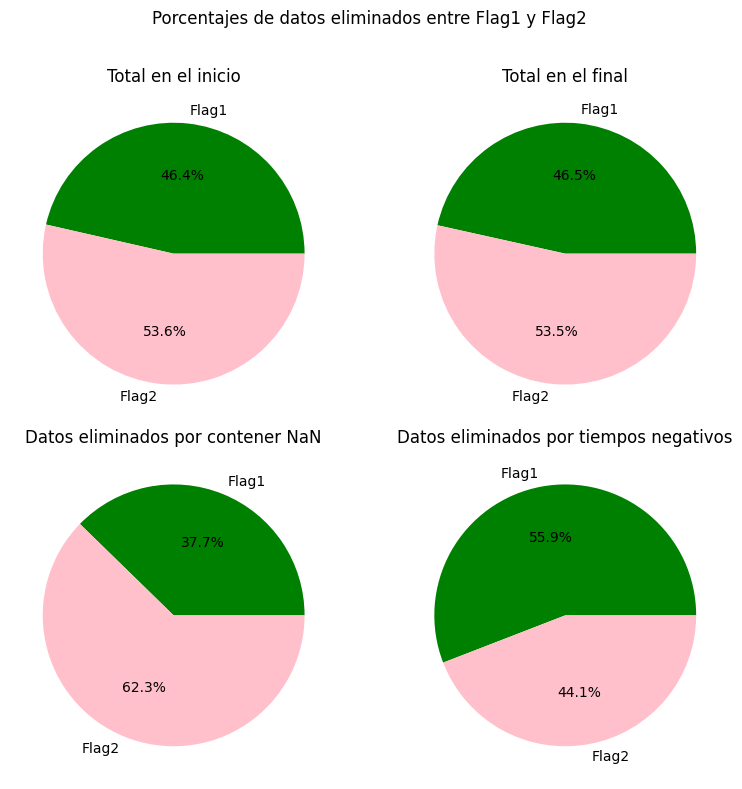

In [10]:
##Grafica del dataframe de  analisis de datos tratados#

import matplotlib.pyplot as plt

# Obtener los porcentajes de flag1 y flag2 en el inicio
porcentajes_inicio = [data['flag1%'][0], data['flag2%'][0]]

# Obtener los porcentajes de flag1 y flag2 en el final
porcentajes_final = [data['flag1%'][1], data['flag2%'][1]]

# Obtener los porcentajes de flag1 y flag2 de la cantidad de datos borrados por contener nan
porcentajes_nan = [data['flag1%'][2], data['flag2%'][2]]

# Obtener los porcentajes de flag1 y flag2 en el final
porcentajes_tiemp_neg = [data['flag1%'][3], data['flag2%'][3]]

# Etiquetas para los gráficos
etiquetas = ['Flag1', 'Flag2']

# Crear una figura y las subparcelas
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Graficar el porcentaje en el inicio en la primera subparcela
axs[0, 0].pie(porcentajes_inicio, labels=etiquetas, autopct='%1.1f%%', colors=['green', 'pink'])
axs[0, 0].set_title('Total en el inicio')

# Graficar el porcentaje en el final en la segunda subparcela
axs[0, 1].pie(porcentajes_final, labels=etiquetas, autopct='%1.1f%%', colors=['green', 'pink'])
axs[0, 1].set_title('Total en el final')

# Graficar el porcentaje de datos eliminados por contener Nan en la tercera subparcela
axs[1, 0].pie(porcentajes_nan, labels=etiquetas, autopct='%1.1f%%', colors=['green', 'pink'])
axs[1, 0].set_title('Datos eliminados por contener NaN')

# Graficar el porcentaje de datos eliminados por tiempos negativos en la cuarta subparcela
axs[1, 1].pie(porcentajes_tiemp_neg, labels=etiquetas, autopct='%1.1f%%', colors=['green', 'pink'])
axs[1, 1].set_title('Datos eliminados por tiempos negativos')

# Ajustar la disposición de los gráficos
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # Ajustar el espacio superior para el título general


# Establecer un título general a la figura
fig.suptitle('Porcentajes de datos eliminados entre Flag1 y Flag2')


# Mostrar la imagen con los gráficos
plt.show()

Podemos observar que si bien se han removido valores, las proporciones de las poblacionales tanto de flag1 como de flag 2 se han mantenido.

Al eliminar los datos por una lectura de sparks donde no se recolectaron datos (mas de 8 celdas con Nan por fila) se elimino una mayor proporcion de datos de la poblacion 2, es decir que tomo como medida algo que no lo era, y es el motivo por el que luego no podemos obtener informacion respecto a la fluorescencia.

Sin embargo cuando se removieron datos por presencia de tiempos negativos, algo que no podria suceder en la realidad se removieron una mayor proporcion de filas correspondientes a la poblacion de flag 1, que es cuando la medida si es un spark. 

Estas diferencias en la remocion de datos si bien por distintos motivos, producen que las poblaciones se mantengan en proporciones casi identicas.

### Registrar medidas caracteristicas

#### Representar frecuencia de variable y distribucion

Los datos a observar son:

Mediana:medida central tal que, con los datos ordenados de menor a mayor, el 50 % de los datos son inferiores a su valor y el 50 % de los datos tienen valores superiores. Esta es util cuando  se tienen datos sesgados o con valores atipicos. Observando la  mediana y la media si difieren significativamente podria indicaruna distribucion no normal o presencia de valores extremos.

*Media*: Es el valor promedio de todos los datos en el conjunto.

*Moda*: valor con mayor frecuencia entre los datos.Puede ser que la moda no sea un valor unico y aparezcan varios maximos en la distribucion de frecuencias. En ese caso se dice que se tiene una distribucion bimodal o trimodal, etc.Se puede utilizar para identificar patrones o caracteristicas dominantes.

*Percentil 25 y 75*: es el valor por debajo del cual se encuentra el 25 o 75% de los datos. Ayuda a entender la dispersion de los datos y la presencia de valores atipicos. que estos valores sean muy distantes implica una gran dispersion.

**Medidas de dispersión** : estas nos indicarán la variabilidad de los datos en torno a su valor promedio, es decir si se encuentran muy o poco esparcidos en torno a su centro

*Rango*: es la diferencia entre el valor maximo y el valor minimo en el conjunto de datos. Un rango grande implica una gran variabilidad en los valores.

*Intercuartil*: es la diferencia entre el percentil 75 y el percentil 25, el rango abarca el 50% central de los datos da informacion sobre la dispersion de los datos en el rango intermedio. Si es estrecho da idea de una meno variabilidad de datos.

*Desviacion Media*: la media aritmética de las diferencias absolutas entre los valores de la variable y la media aritmética de la muestra. Es una manera de estimar la dispersion de los valores de la muestra.

*Varianza*: media de los cuadrados de las diferencias entre cada valor y la media del conjunto de datos.

*Desviacion estandar*:  medida para estimar la dispersion de los datos, es especialmente util cuando se usa la media aritmetica como media de tendencia central. Es la medida de dispersión promedio de los datos con respecto a la media. En vez de tomar valores absolutos de las desviaciones, para evitar ası́ que se compensen desviaciones positivas y negativas, se usan los cuadrados de las desviaciones. Esto hace además que los datos con desviaciones grandes influyan mucho en el resultado final. Ésta será siempre positiva y sólo tendrá un valor nulo cuando todas las observaciones coincidan con el valor de la media. No es una medida robusta de la dispersion, menos aun cuando se tiene algun dato muy alejado de la media. Es una buena medida de dispersion cuando la distribucion es normal

Estas tres medidas, desviacion media, varianza y desviacion estandar son medidas que permiten cuantificar la dispersión de los datos en relación con la media. Si la desviación estándar o la varianza son altas, indica que los datos están más dispersos.

*Coeficiente de Variacion*:  Es la relación entre la desviación típica y la media, expresada como un porcentaje. Indica la variabilidad relativa de los datos. comparar la variabilidad relativa de diferentes conjuntos de datos. Un coeficiente de variación alto indica una mayor dispersión en relación con la media.

con la linea de comando
```python

df.describe()
```

obtendriamos las medidas caracteristicas de ditribucion para todos los valores de cada columna, sin embargo este dato no es relevante ya que tenemos dos poblaciones y por lo tanto debemos conocer estos valores para cada poblacion.


In [13]:
# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Inicializar el dataframe de resultados
resultados = pd.DataFrame(columns=['Columna', 'Mediana_1', 'Mediana_2', 'Media1','Media2','Moda_1', 'Moda_2', 'Percentil_25_1', 'Percentil_25_2',
                                   'Percentil_75_1', 'Percentil_75_2', 'Rango_1', 'Rango_2', 'Intercuartil_1', 'Intercuartil_2',
                                   'DesviacionMedia_1', 'DesviacionMedia_2', 'Varianza_1', 'Varianza_2', 'DesviacionEstandar_1',
                                   'DesviacionEstandar_2', 'CoeficienteVariacion_1', 'CoeficienteVariacion_2'])

# Paso 3: Calcular las estadísticas descriptivas para cada población de cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"

    # Calcular estadísticas para la población 1
    mediana_1 = poblacion1[columna].median()
    media_1 = poblacion1[columna].mean()
    moda_1 = poblacion1[columna].mode().values[0] if not poblacion1[columna].mode().empty else np.nan
    percentil_25_1 = poblacion1[columna].quantile(0.25)
    percentil_75_1 = poblacion1[columna].quantile(0.75)
    rango_1 = poblacion1[columna].max() - poblacion1[columna].min()
    intercuartil_1 = percentil_75_1 - percentil_25_1
    desviacion_media_1 = np.mean(np.abs(poblacion1[columna] - mediana_1))
    varianza_1 = poblacion1[columna].var()
    desviacion_estandar_1 = poblacion1[columna].std()
    coef_variacion_1 = desviacion_estandar_1 / media_1

    # Calcular estadísticas para la población 2
    mediana_2 = poblacion2[columna].median()
    media_2 = poblacion2[columna].mean()
    moda_2 = poblacion2[columna].mode().values[0] if not poblacion2[columna].mode().empty else np.nan
    percentil_25_2 = poblacion2[columna].quantile(0.25)
    percentil_75_2 = poblacion2[columna].quantile(0.75)
    rango_2 = poblacion2[columna].max() - poblacion2[columna].min()
    intercuartil_2 = percentil_75_2 - percentil_25_2
    desviacion_media_2 = np.mean(np.abs(poblacion2[columna] - mediana_2))
    varianza_2 = poblacion2[columna].var()
    desviacion_estandar_2 = poblacion2[columna].std()
    coef_variacion_2 = desviacion_estandar_2 / media_2

    # Agregar las estadísticas al dataframe de resultados
    resultados.loc[len(resultados)] = [columna, mediana_1, mediana_2, media_1, media_2, moda_1, moda_2, percentil_25_1, percentil_25_2,
                                       percentil_75_1, percentil_75_2, rango_1, rango_2, intercuartil_1, intercuartil_2,
                                       desviacion_media_1, desviacion_media_2, varianza_1, varianza_2,
                                       desviacion_estandar_1, desviacion_estandar_2, coef_variacion_1, coef_variacion_2]

#Guardar en la tabla los reultados de estadistica
resultados.to_csv(r'C:\Users\maca2\OneDrive\Documentos\Github\trabajo_final_alga-aras\medidas_caracteristicas.csv', index=False)

# Imprimir los resultados
resultados.head()


,Columna,Mediana_1,Mediana_2,Media1,Media2,Moda_1,Moda_2,Percentil_25_1,Percentil_25_2,Percentil_75_1,...,Intercuartil_1,Intercuartil_2,DesviacionMedia_1,DesviacionMedia_2,Varianza_1,Varianza_2,DesviacionEstandar_1,DesviacionEstandar_2,CoeficienteVariacion_1,CoeficienteVariacion_2
0,tiempo_maximo,8.000000,6.000000,8.887021,8.043054,4.000000,4.0,4.000000,3.000000,12.000000,...,8.000000,8.000000,4.470588,4.631194,31.068532,42.899771,5.573915,6.549792,0.627197,0.814341
1,intensidad_maxima,6.750000,10.545455,15.622176,17.560239,6.000000,5.0,6.090909,6.196154,21.989130,...,15.898221,18.083067,9.737952,11.348850,195.913532,251.958621,13.996912,15.873205,0.895964,0.903929
2,intensidad_minima,5.944444,6.864198,12.488130,13.602208,5.666667,5.5,5.589572,5.407670,17.609524,...,12.019952,13.819602,7.190475,8.389770,116.861370,148.324012,10.810244,12.178835,0.865641,0.895357
3,tiempo_valle,10.000000,8.000000,10.500467,9.724614,7.000000,6.0,7.000000,5.000000,14.000000,...,7.000000,7.000000,4.433240,4.691308,32.005374,44.767190,5.657329,6.690829,0.538769,0.688030
4,intensidad_valle,6.100000,8.115385,13.284357,14.600924,6.000000,6.0,5.666667,5.500000,18.888889,...,13.222222,14.740385,7.910218,9.190820,126.954814,166.434894,11.267423,12.900965,0.848172,0.883572


Observando las medidas descriptivas de caa poblacione podemos empezar a realizar observaciones de distinto tipo si la mediana, media, moda o percentiles son muy similares o cercanas entra las dos poblaciones se puede decir que no hay diferencias significativas en esas medidas entre las poblaciones.Si hay diferencias en medidas como la mediana o la media entre las poblaciones, podria indicar que las distribuciones de los datos son diferentes y que existe una posible diferencia significativa entre las poblaciones.

Si hay diferencias notables entre las poblaciones en las medidas de dispersión como lo son el rango, intercuartil, desviación estándar, coeficiente de variación, se puede decir que hay una variabilidad diferente entre las poblaciones y que existe una posible diferencia significativa en la dispersión de los datos.

Observando las muestras podemos pensar que hay una tendencia de los datos a mostrar una distribucion no normal  dado que las medidas descriptivas y las medidas de dispersion presentan diferencias relativamente grandes entra las poblaciones.

### Evaluar normalidad
De las medidas caracteristicas obtenidas y teniendo en cuenta las descripciones de cada medida caracteristica, podemos decir que las poblaciones para la mayoria de los datos no poseerian una distribucion normal.
Sin embargo para poder asegurar si las poblaciones siguen o no una distribucion normal se debe realizar un test. Existe dos pruebas muy comunmente usadas el que dan resultados similares pero difieren en sus supuestos y en su poder para detectar desviaciones de la noralidad.

+ *Normal test*( D’Agostino- Pearson): basado simultáneamente en los llamados coeficientes de asimetría y de curtosis y que rechaza
la hipótesis de normalidad cuando la simetría y/o la curtosis del conjunto de datos difieren
bastante de las que cabría esperar en el caso normal. Es un test mas sensible a las desviaciones en las colas de la distribucion y es mas apropiado para muestras grandes.

+ *Shapiro test*(Shapiro-Wilk): mas potente que el de D’Agostino-Pearson, se enfoca en la correlacion entre valores observados y los valores esperados bajo la hipotesis de normalidad. Detecta desviaciones en la parte central de la distribucion y es apropiado para muestras pequeñas

Teniendo en cuenta los mecanismos de estos test y el tamaño de las poblaciones de cada dato a analizar se aplicara un normal test.

In [14]:
import scipy.stats as stats
from scipy.stats import normaltest

In [15]:
#### con test de normalidad ###

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Realizar el test de distribución para cada columna
resultados = {}

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    # Obtener los datos de la columna para cada población
    datos_poblacion1 = poblacion1[columna]
    datos_poblacion2 = poblacion2[columna]
    
    # Realizar el test de normalidad para cada población
    _, p_valor_poblacion1 = stats.normaltest(datos_poblacion1)
    _, p_valor_poblacion2 = stats.normaltest(datos_poblacion2)
    
    # Determinar si sigue una distribución normal
    sigue_normal_poblacion1 = p_valor_poblacion1 > 0.05
    sigue_normal_poblacion2 = p_valor_poblacion2 > 0.05
    
    # Almacenar los resultados del test de distribución para cada columna
    resultados[columna] = {'p_valor_poblacion1': p_valor_poblacion1, 'p_valor_poblacion2': p_valor_poblacion2,
                           'sigue_normal_poblacion1': sigue_normal_poblacion1, 'sigue_normal_poblacion2': sigue_normal_poblacion2}

# Paso 3: Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Imprimir los resultados
print(resultados_df)


                        tiempo_maximo intensidad_maxima intensidad_minima   
p_valor_poblacion1                0.0               0.0               0.0  \
p_valor_poblacion2                0.0               0.0               0.0   
sigue_normal_poblacion1         False             False             False   
sigue_normal_poblacion2         False             False             False   

                        tiempo_valle intensidad_valle sparks_amplitud    TTP   
p_valor_poblacion1               0.0              0.0             0.0    0.0  \
p_valor_poblacion2               0.0              0.0             0.0    0.0   
sigue_normal_poblacion1        False            False           False  False   
sigue_normal_poblacion2        False            False           False  False   

                        sparks_tiempo_pico50  TTP50 fullWidth (ΔF/F0)/ΔTmax   
p_valor_poblacion1                       0.0    0.0       0.0           0.0  \
p_valor_poblacion2                       0.0    0.0    

In [18]:
#tengo que renombrar la columna(ΔF/F0)/ΔTmax para que me guarde la imagen del histograma
df.rename(columns={'(ΔF/F0)/ΔTmax':'(amplitud)(tiempo al pico)'},inplace=True)
df.head()

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,TTP50,fullWidth,(amplitud)(tiempo al pico),fullDuration,width,high,flag
0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


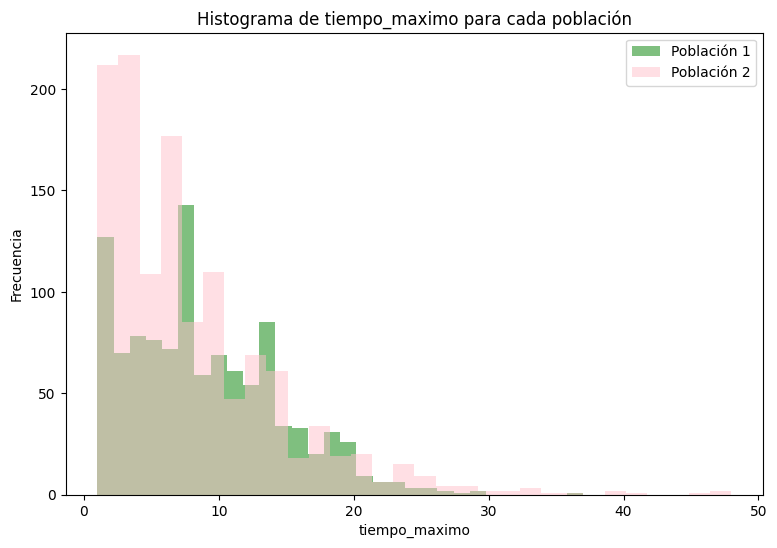

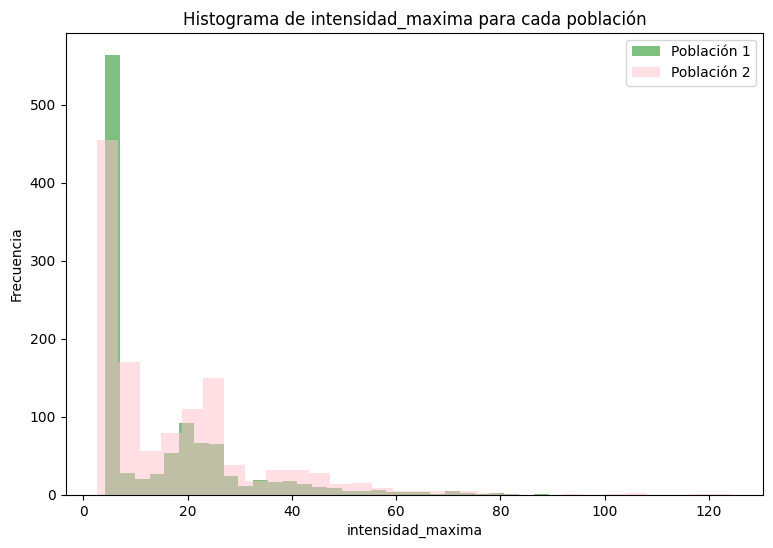

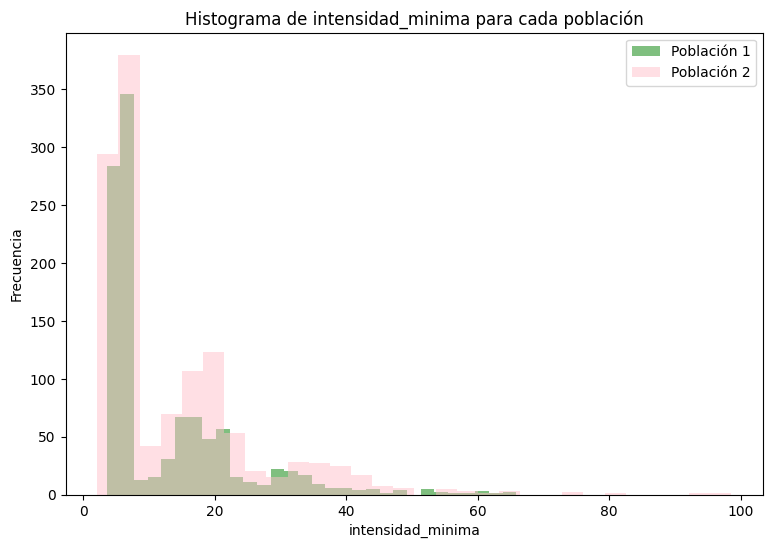

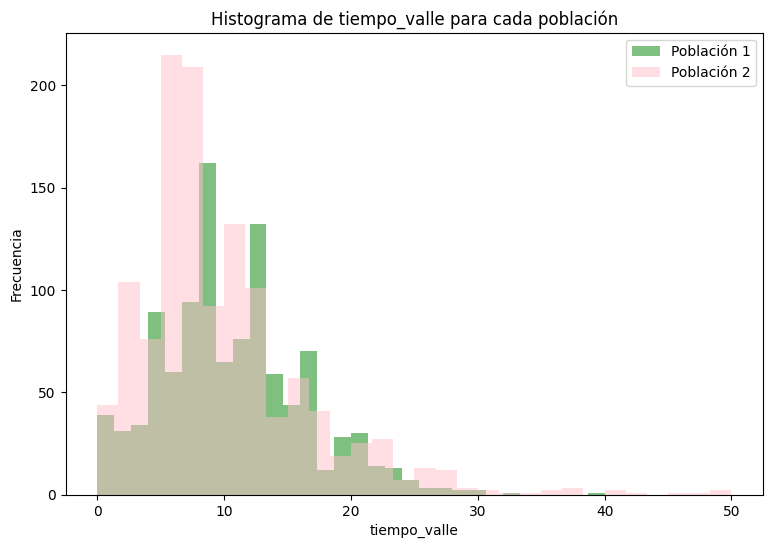

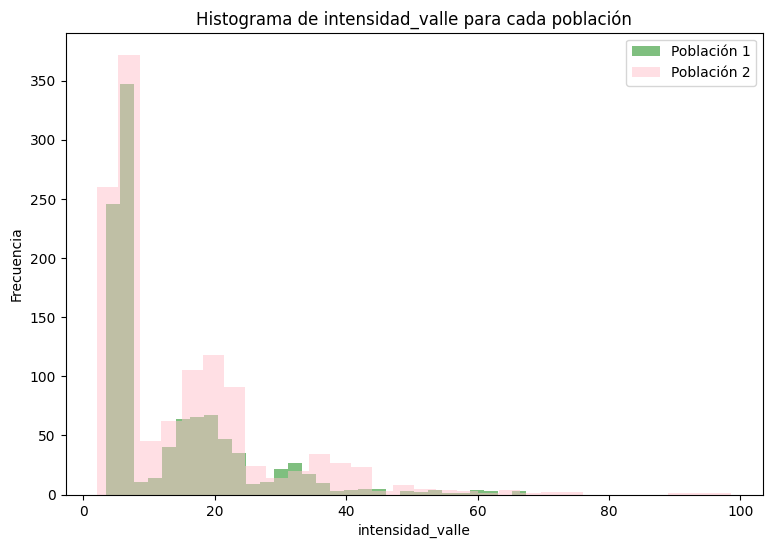

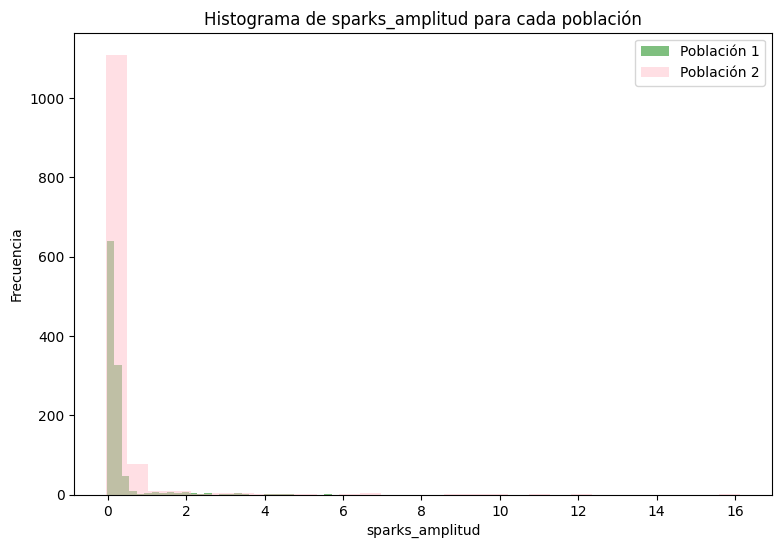

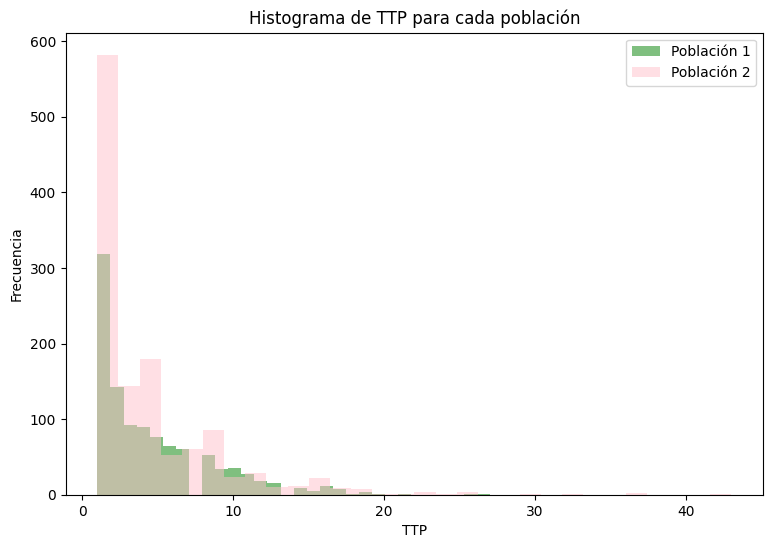

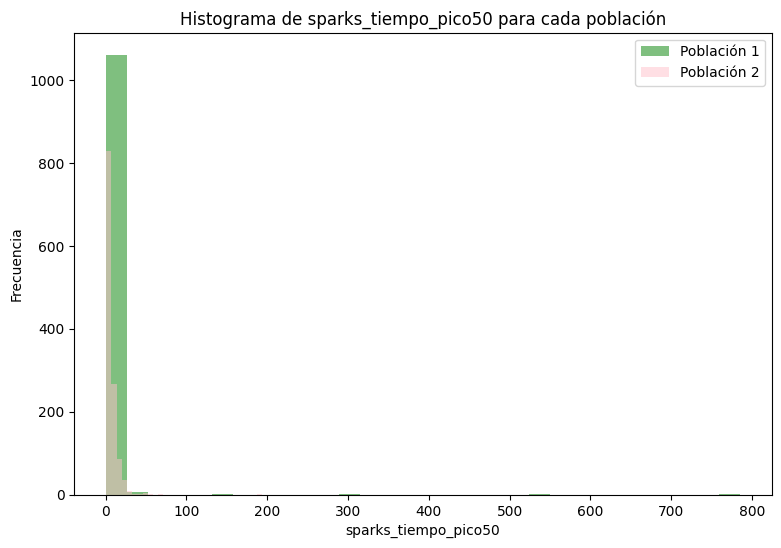

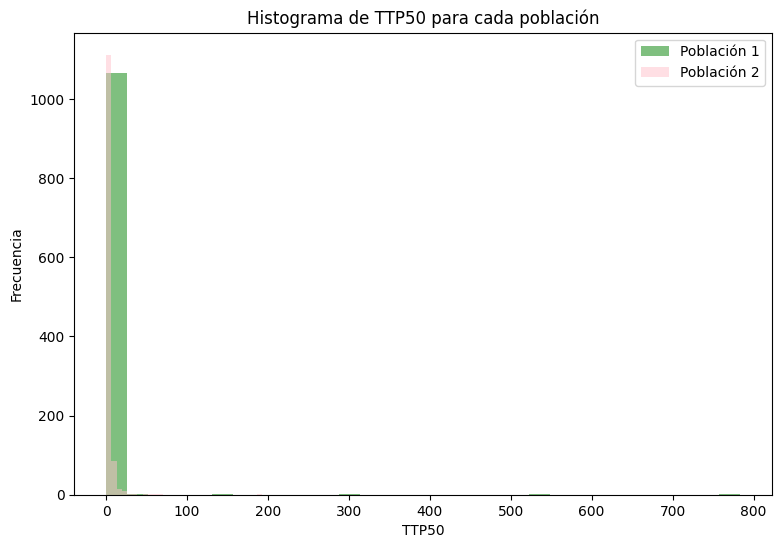

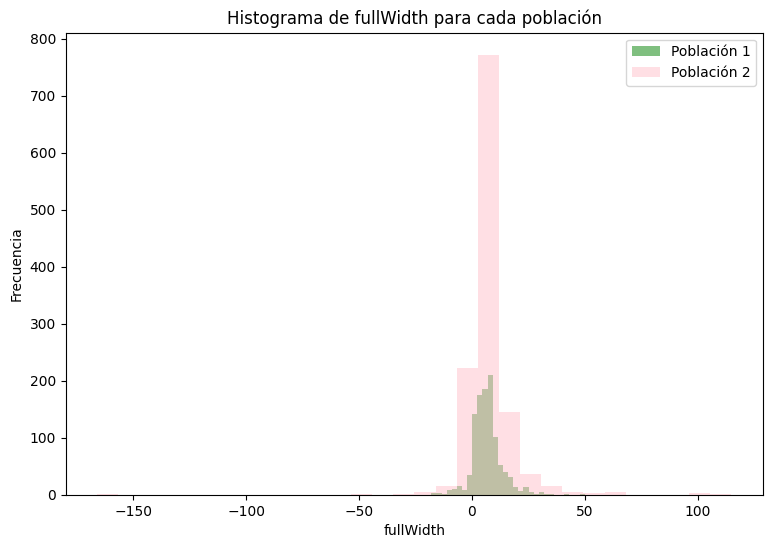

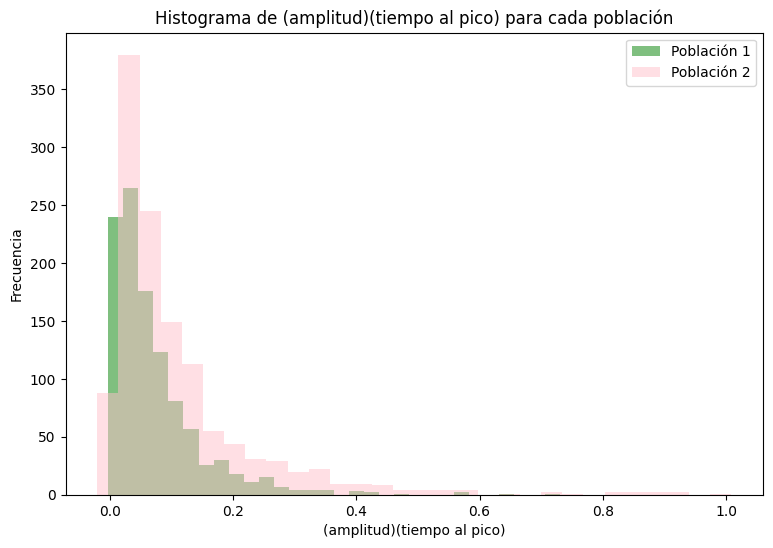

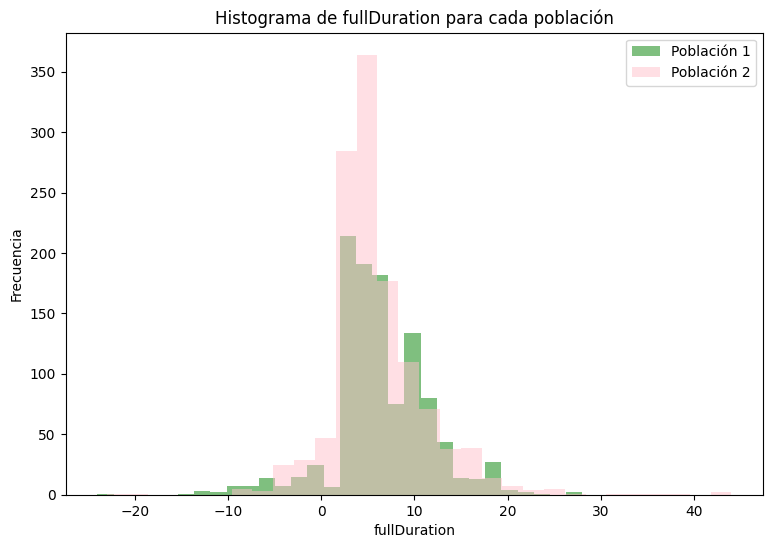

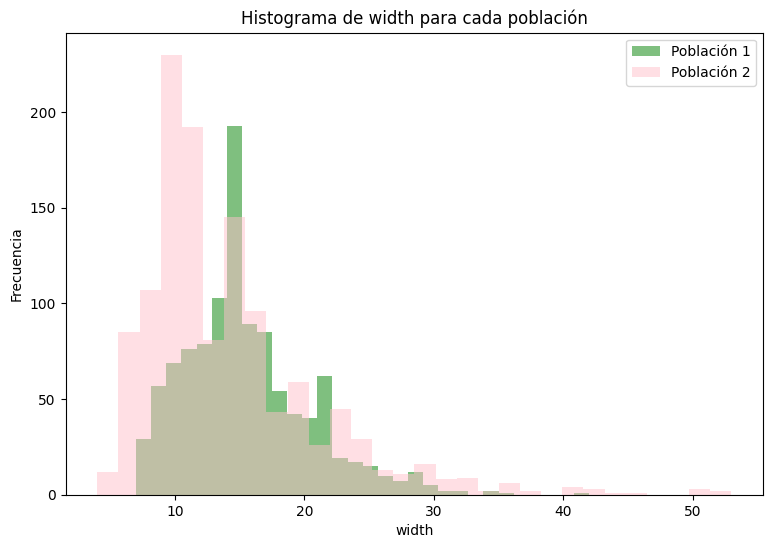

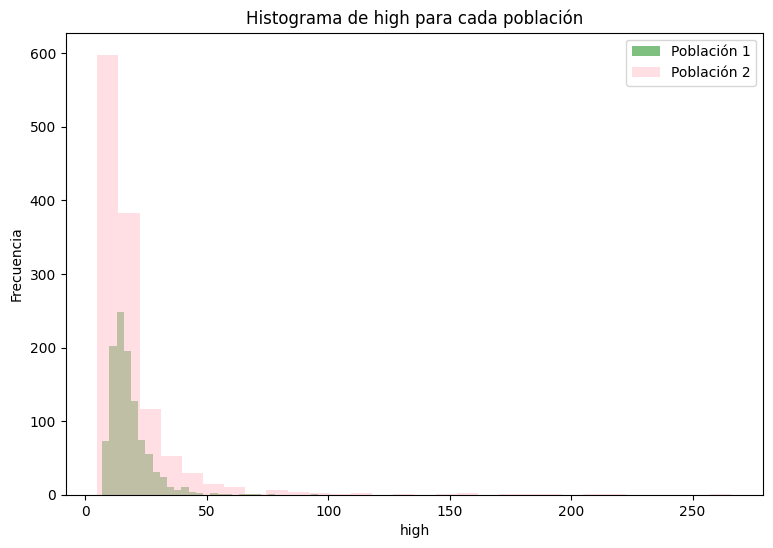

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

# Paso 2: Generar histogramas separados por población para cada columna
for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    
    plt.figure(figsize=(9, 6))
    plt.hist(poblacion1[columna], bins=30, alpha=0.5, label='Población 1', color='green')
    plt.hist(poblacion2[columna], bins=30, alpha=0.5, label='Población 2', color='pink')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna} para cada población')
    plt.legend()
    plt.savefig(f'{columna}_hist')  # Guardar imagen del histograma
    plt.show()


Podemos ahora si decir en base al test de normalidad y los histogrmas que ninguna de las poblaciones sigue una distribucion normal. Esto es muy importante al momento de hacer ensayo de hipotesis ya que podemos decir que nuestros datos no siguen una distribucion nomal

### Calcular intervalo de confianza

Como nos interesa ademas de dar una estimacion, precisar la incertidumbre de esa estimacion, es que calculamos los intervalos de confianza, sobre el cual podemos establecer con cierta probabilidad si esta contenido el parametro poblacional desconocido. Asi en lugar de un unico estimador se determinan dos estimadores, uno de limite inferior y otro superior.

"Aún cuando falle la hipótesis de normalidad de las observaciones, el teorema del límite central puede garantizarnos todavía la normalidad aproximada de la media muestral X¯ cuando n es grande (a efectos prácticos, la aproximación la venimos considerando aceptable si n ≥ 60); los intervalos precedentes proporcionan entonces un nivel de confianza aproximado de 1 − α. "(pagina 145 libro de Bioestadistica, de Agustín García Nogales).

Es por esto que podemos calcular los intervalos de confianza de la media de cada poblacion de cada columna aunque la distribucion de estos no sea normal.

In [124]:
# Calcular los intervalos de confianza para la media de cada columna
confidence_level = 0.95
confidence_intervals = {}

# Paso 1: Crear las dos poblaciones según el criterio de la columna "flag"
poblacion1 = df[df['flag'] == 1]
poblacion2 = df[df['flag'] == 2]

for columna in df.columns:
    if columna == 'flag':
        continue  # Saltar la columna "flag"
    #intervalo para poblacion 1
    mean1 = np.mean(poblacion1)
    n1 = len(poblacion1)
    std_error1 = np.std(poblacion1, ddof=1) / np.sqrt(n1)
    margin_of_error1 = std_error1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
    confidence_interval_1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)

    #intervalo para poblacion 2
    mean2 = np.mean(poblacion2)
    n2 = len(poblacion2)
    std_error2 = np.std(poblacion2, ddof=1) / np.sqrt(n2)
    margin_of_error2 = std_error2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)
    confidence_interval_2 = (mean2 - margin_of_error2, mean2 + margin_of_error2)

# Almacenar los intervalos de confianza en el diccionario
    confidence_intervals[columna] = {'Poblacion 1': confidence_interval_poblacion1,
                                     'Poblacion 2': confidence_interval_poblacion2}

# Imprimir los intervalos de confianza
for columna, intervals in confidence_intervals.items():
    print(f'Columna: {columna}')
    print(f'Poblacion 1: {intervals["Poblacion 1"]}')
    print(f'Poblacion 2: {intervals["Poblacion 2"]}')
    print()


Columna: tiempo_maximo
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_maxima
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_minima
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: tiempo_valle
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: intensidad_valle
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: sparks_amplitud
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: TTP
Poblacion 1: (17.16773947335639, 18.160700893616088)
Poblacion 2: (18.021802112684387, 20.24946594510052)

Columna: sparks_tiempo_pico50
Poblacion 1: (17.16773947335639, 18.160700893616088)
Pobla

### Determinar tamaño de muestra

La determinación del tamaño muestral requerido para obtener la estimación de los parámetros poblacionales con una determinada precisión. La precisión de una estimación por intervalos de confianza vendrá marcada por la longitud del intervalo (en ocasiones, llamada error).

La longitud del intervalo es inversamente proporcional al tamaño de la muestra y la precisión aumenta, por tanto, al aumentar n. 

En nuestro caso donde el experimento ya ocurrio calcularemos el tamaño muestral para conocer si tenemos la cantidad de datos necesarios para hacer inferencias estadisticas. En caso que la cantidad de datos que obtengamos del calculo de tamaño muestral sea menor a la cantidad de datos quetenemos, al hacer ensayos de hipotesis si encontramos que hay diferencias ese valor no seria confiable por que no hay el tamaño muestral minimo para que ese resultado tenga peso. Mientras que en el caso de dar negativo, no sabemos si es por que realmente no hay diferencia o faltan muestras.

En este caso las muestras no siguen una distribucion normal razon por la cual no podemos aplicar el siguiente comando dado que el efecto se basa en una diferencia de medias dividido por la desviacion estandar, medidas de dispersion que toman relevancia cuando los datos siguen una distribucion normal.

```python
ttp = TTestIndPower()
nivel de confianza=0.95
tamanio_muestral = ttp.solve_power(effect_size=(abs(mean1-mean2))/ (poblacion.std()),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
```

Considerando que el tamaño muestral es muy grande (mayor a 2330 muestras) podemos proseguir con el analisis estadistico asumiendo que el tamaño muestral es lo suficientemente grande para hacer inferencias estadisticas.

Sin embargo considerando lo mismo que el intervalo de confianza, del teorema del limite central podremos evaluar el tamaño muestral utilizando las medias y la desviacion estandar. 
Este valor podria tambien ser seleccionado de acuerdo a la magnitud de la diferencia que se considere relevante o importante.

In [20]:
import pandas as pd
from statsmodels.stats.power import TTestIndPower

In [21]:
##TAMAÑO MUESTRAL##
# Definir los parámetros
nivel_confianza = 0.95

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Crear una lista para almacenar los tamaños muestrales
tamanios_muestrales = []

# Recorrer las columnas del DataFrame original
for columna in df.columns:
    # Obtener los valores de la columna y la última columna (flag)
    valores = df[columna]
   
    # Filtrar los valores para cada población
    poblacion_1 = valores[df['flag'] == 1]
    poblacion_2 = valores[df['flag'] == 2]
    mean1 = np.mean(poblacion_1)
    mean2 = np.mean(poblacion_2)
    # Calcular el tamaño muestral para cada población utilizando statsmodels
    tamanio_muestral_1 = ttp.solve_power(effect_size= (abs(mean1-mean2))/ (poblacion_1.std()),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
    
    tamanio_muestral_2 = ttp.solve_power(effect_size=(abs(mean1-mean2))/ (poblacion_2.std()),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')

    
    # Agregar los tamaños muestrales a la lista
    tamanios_muestrales.append({'Columna': columna, 'Población 1': tamanio_muestral_1, 'Población 2': tamanio_muestral_2})

# Convertir la lista en un DataFrame
tammues = pd.DataFrame(tamanios_muestrales)

# Imprimir el DataFrame de resultados
print(tammues)

                       Columna  Población 1   Población 2
0                tiempo_maximo   685.671213    946.415759
1            intensidad_maxima   819.737751   1053.965275
2            intensidad_minima  1478.968637   1876.893211
3                 tiempo_valle   835.604807   1168.410037
4             intensidad_valle  1150.702728   1508.246211
5              sparks_amplitud   406.651608   1489.777546
6                          TTP  3193.676602   3995.801369
7         sparks_tiempo_pico50  3673.192787    284.942885
8                        TTP50  6984.166414    403.585076
9                    fullWidth  4182.827877  15177.221267
10  (amplitud)(tiempo al pico)    71.497378    194.018343
11                fullDuration  9202.024904   9537.006209
12                       width   222.641238    449.177205
13                        high   462.310602   2729.799082
14                        flag       [10.0]        [10.0]


C:\Users\maca2\AppData\Local\Temp\ipykernel_24036\1203194239.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  tamanio_muestral_1 = ttp.solve_power(effect_size= (abs(mean1-mean2))/ (poblacion_1.std()),
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
C:\Users\maca2\AppData\Local\Temp\ipykernel_24036\1203194239.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  tamanio_muestral_2 = ttp.solve_power(effect_size=(abs(mean1-mean2))/ (poblacion_2.std()),
C:\Users\maca2\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


No encuentro por que da un warning, pareceria que esta dividiendo por cero, pero no hay desviaciones estandar de poblacionales que sean cero, la mas chica que tengo es de 0.08. 

Mas alla de esto la cantidad de muestra que tengo es de 2302 datos totales de los cuales 1071 corresponden a la poblacion 1 (flag1) y 1231 corresponden a la poblacion 2 (flag2)
Considerando que las muestars no siguen una distribucion normal y los datos son grandes entonces podriamos considerar que el tamaño muestral es superior al que necesito y puedo hacer inferencias estadisticas de cualquiera de los datos que me produce la medida del spark.

Sin embargo si considero el calculo de tamaño muestral que se hace para distribuciones normales, solo algunos datos podrian utilizarse para evaluar diferencias estadisticas, estos son:
* tiempo maximo
* intensidad maxima
* tiempo valle
* (ΔF/F0)/ΔTmax
* width

Voy a optar por considerar que las muestras que tengo son mas grandes que lo que necesito, debido a que no tengo forma de asegurar que puedo aplicar esta forma de calculo del tamaño muestral a mis muestras.

### Ensayo de hipotesis


Contrastes de hipótesis para dos o más poblaciones

Como mis datos no siguen una distribucion normal, evalue alternativas para analizar contraste de hipotesis entre ellos:

* Wilcoxon: modelo estadístico corresponde a un equivalente de la prueba t de Student, pero se aplica en mediciones en escala ordinal para muestras dependientes. es una alternativa de aceptable eficacia para contrastar hipótesis.

* Man-Whitneyu es una alternativa no parametrica al test de student y se utiliza para comparar dos muestras independientes cuando no se cumplen los supuestos de normalidad y homogenidad de varianzas. Los espacios muestrales deben ser similares en tamaño. Utiliza la suma de los rangos de una de las muestras para calcular una estadística, que se compara con una distribución de referencia para determinar la significancia estadística. En este test la hipótesis nula dice que no hay diferencia entre las distribuciones de los dos grupos. La hipótesis alternativa es que hay una diferencia significativa. 

* Kruskal-Wallis que compara las medianas de dos o mas grupos independientes. La prueba de Kruskal-Wallis se basa en los rangos de los datos y utiliza una estadística de prueba que se distribuye según la distribución chi-cuadrado. En el test de Kruskal-Wallis, la hipótesis nula es que todas las muestras o grupos tienen la misma distribución. La hipótesis alternativa es que al menos un grupo tiene una distribución diferente.

Considerando que mis datos no siguen una distribucion normal es que considere posibles candidatos a utilizar los test antes detallados. Como son datos independientes descarte el uso de Wilcoxon, y como solo quiero evaluar diferencias entre poblacion 1 y 2 y ademas estos datos son de tipo cuantitativos descarto el uso de Kruskal-Wallis dando como la mejor opcion para evaluar el contraste de hipotesis el test de **Man Whitneyu**.

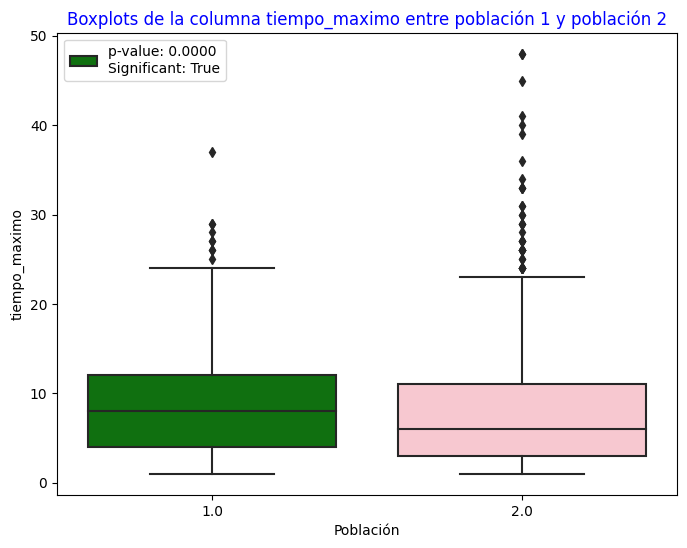

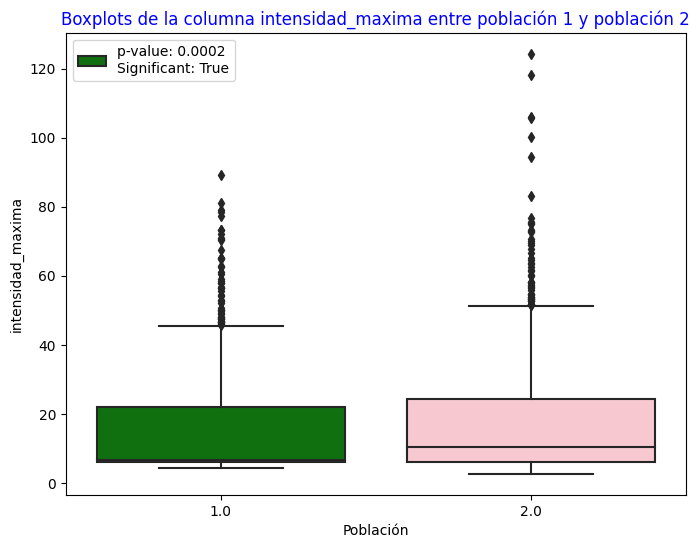

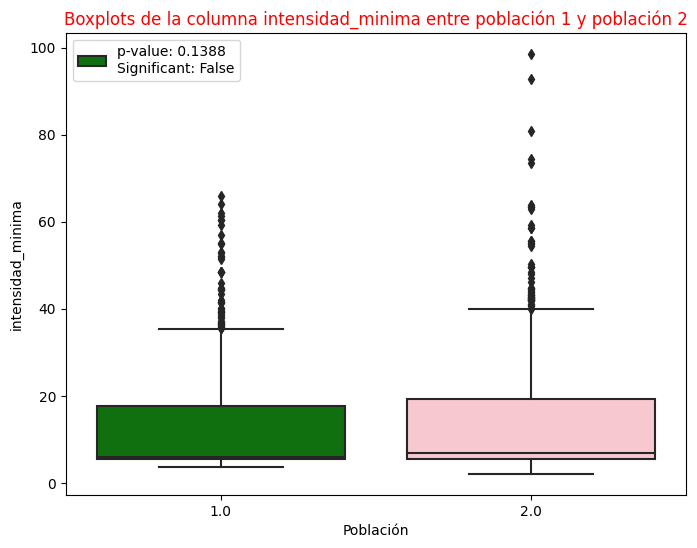

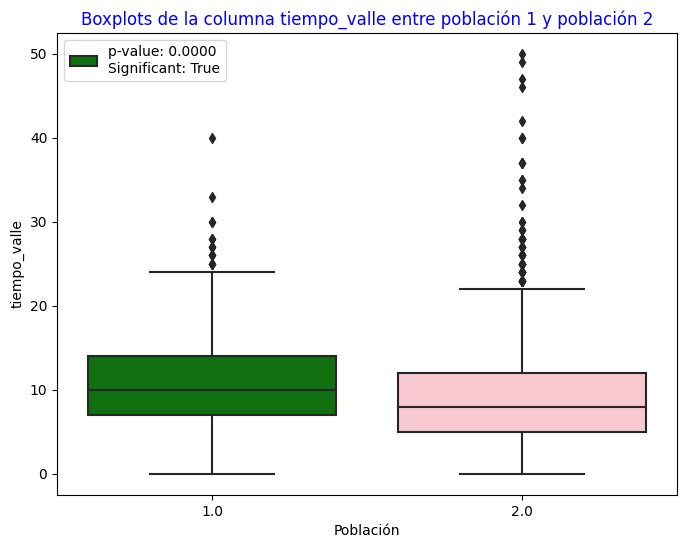

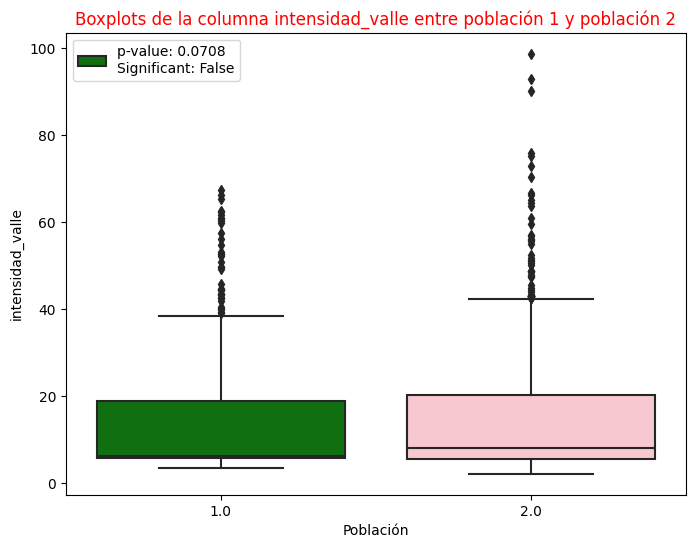

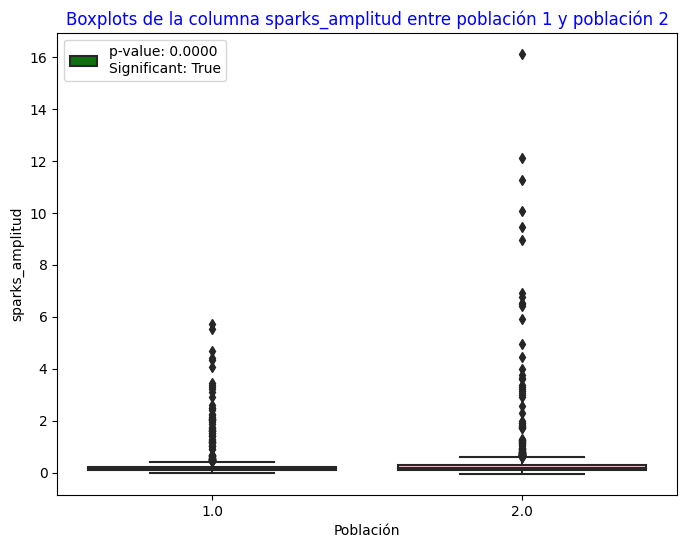

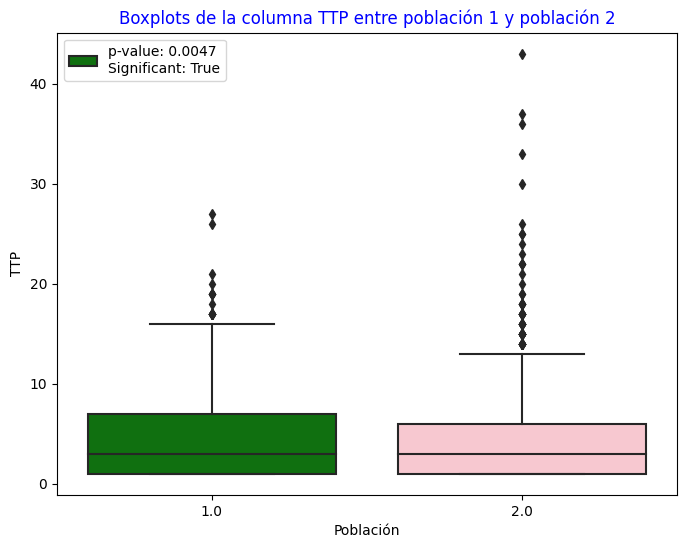

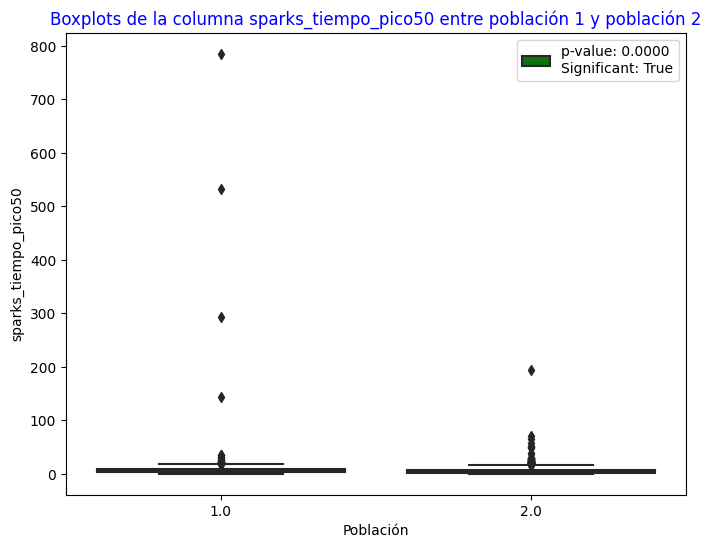

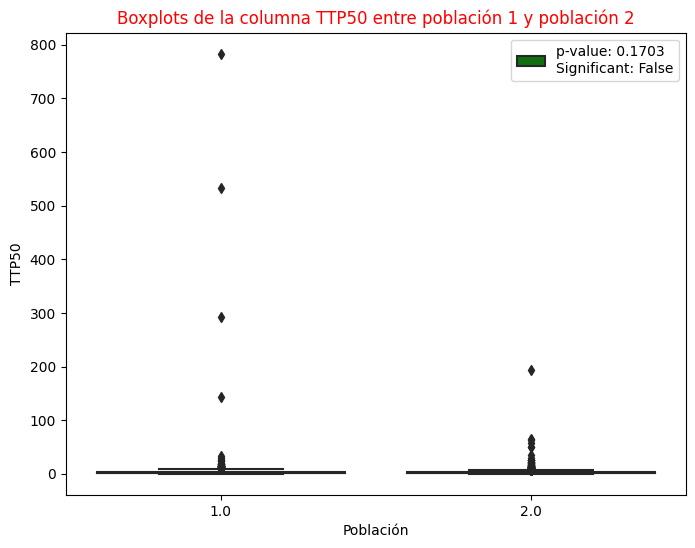

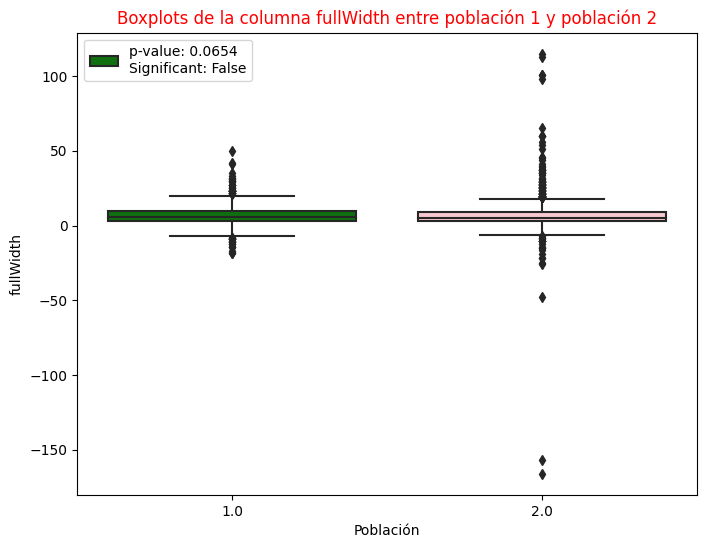

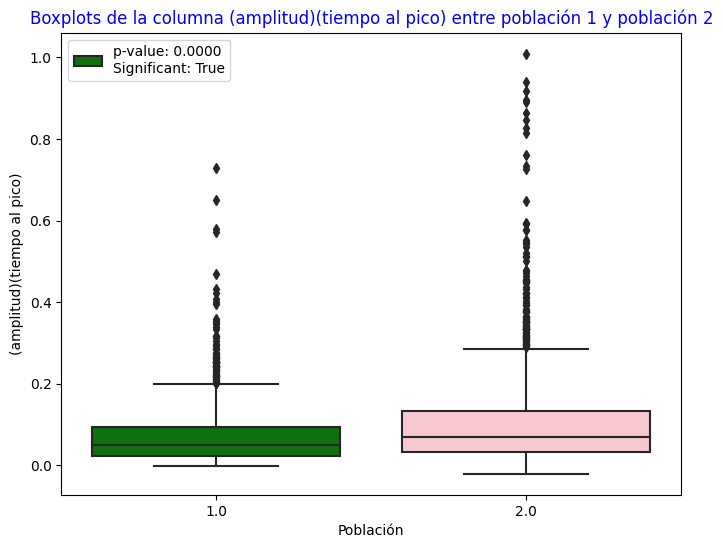

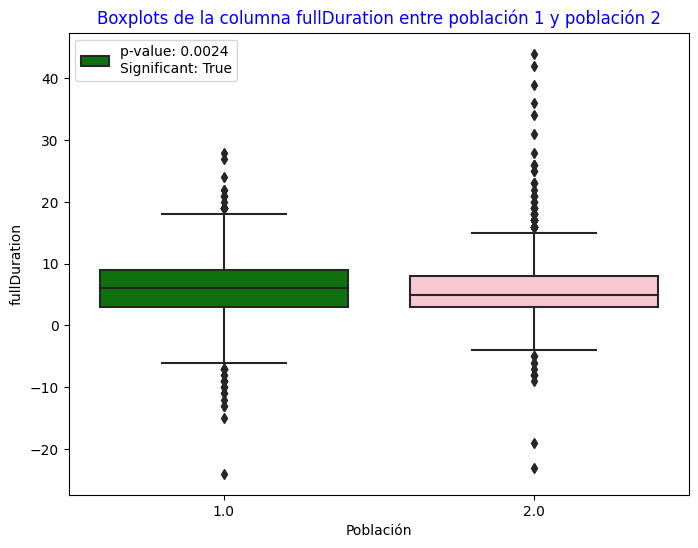

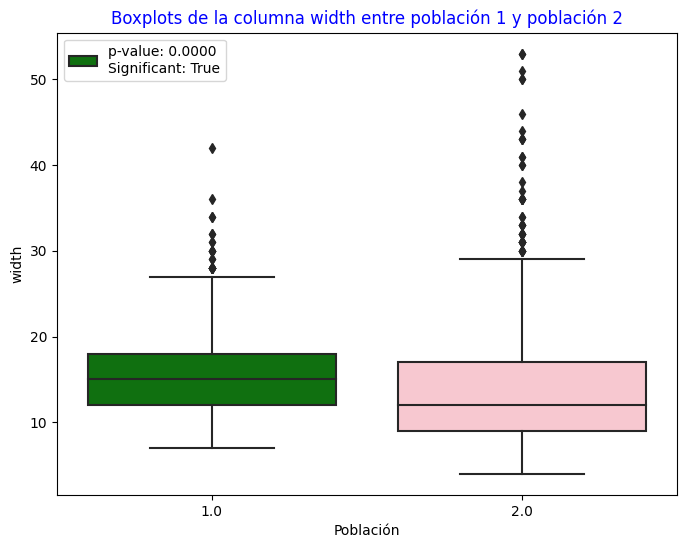

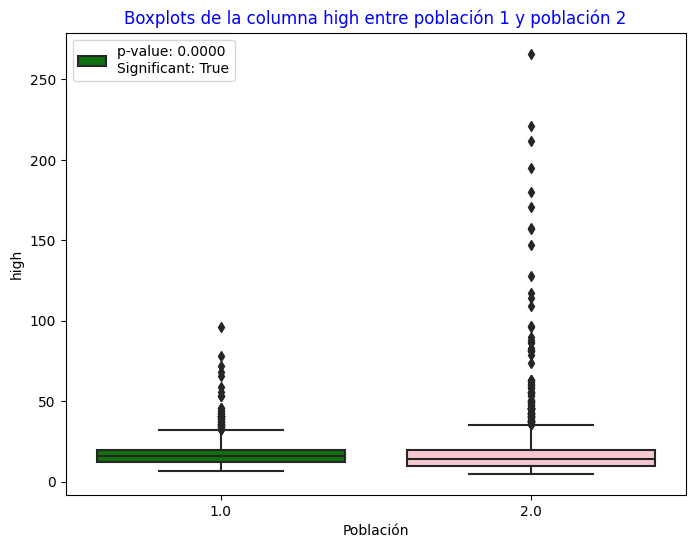

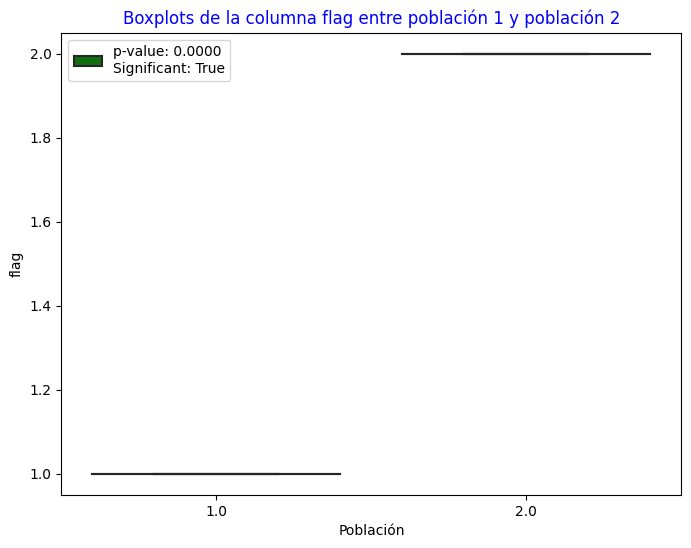

                        Column  Mann-Whitney U Statistic       p-value   
0                tiempo_maximo                  748858.5  1.628056e-08  \
1            intensidad_maxima                  600458.0  2.216825e-04   
2            intensidad_minima                  635653.0  1.387864e-01   
3                 tiempo_valle                  749165.0  1.466337e-08   
4             intensidad_valle                  630459.0  7.078452e-02   
5              sparks_amplitud                  538131.0  2.715698e-14   
6                          TTP                  703325.5  4.721511e-03   
7         sparks_tiempo_pico50                  742079.5  1.885472e-07   
8                        TTP50                  681013.0  1.702983e-01   
9                    fullWidth                  688420.5  6.540051e-02   
10  (amplitud)(tiempo al pico)                  537844.5  2.362018e-14   
11                fullDuration                  707301.5  2.412854e-03   
12                       width        

In [28]:
###MANNWHITNEYU##
#bibliotecas a usar
from scipy.stats import mannwhitneyu

# Crear una lista para guardar los resultados
results = []

# Iterar sobre cada columna del df
for column in df.columns:
    # Filtrar por poblacion(flag 1 y  flag 2)
    poblacion1 = df[column][df['flag'] == 1]
    poblacion2 = df[column][df['flag'] == 2]
    
    # Aplicar el test de  Mann-Whitney sobre la poblacion 1 vs 2 para cada columna
    statistic, p_value = mannwhitneyu(poblacion1, poblacion2)
    
    # Determinar si es significativo el resultado obtenido
    is_significant = p_value < 0.05
    
    # Agregar el resultado a la lista
    results.append({'Column': column, 'Mann-Whitney U Statistic': statistic, 'p-value': p_value, 'Significant Difference': is_significant})
    
    #Generar boxplot
    colors = ['green', 'pink']
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='flag', y=column, data=df, palette=colors)
    plt.xlabel('Población')
    plt.ylabel(column) 
    # Cambiar el color del titulo segun si es significativo o no la compracion entre poblaciones
    title_color = 'blue' if is_significant else 'red'
    plt.title(f'Boxplots de la columna {column} entre población 1 y población 2', color=title_color)
    # Mostrar el p-value y si es significativo en la legenda de la imagen
    legend_text = f'p-value: {p_value:.4f}\nSignificant: {is_significant}'
    plt.legend([legend_text])
    plt.show()

# convierto la lista a un Dataframe
results_df = pd.DataFrame(results)
   
# Print the results
print(results_df)


En el test de Mann-Whitney, la hipótesis nula es que no hay diferencia entre las distribuciones de los dos grupos. La hipótesis alternativa es que hay una diferencia significativa. Entonces si el valor p resultante es menor que el nivel de significancia deseado (por ejemplo, 0.05), se puede concluir que hay evidencia estadística para rechazar la hipótesis nula y afirmar que hay diferencias significativas entre las dos poblaciones en esa columna específica. 
(si dice TRUE hay diferencia entre las poblaciones)

Datos cuyas poblaciones NO fueron significativamente diferentes:
* intensidad_minima
* intensidad_valle
* TTP50
* fullWidth

El resto de las variables probaron tener diferencias segun pertenecieran a la poblacion 1(flag1) o a la poblacion 2(flag2).
En los boxplot  muestran la mediana, los cuartiles y los valores atípicos de los datos, permitiendo visualizar la distribución y la dispersión de cada grupo, este tipo de grafico nos permite ver cuando  las poblaciones son similares ya que integra varias medidas caracteristicas de la poblacion. Si nos detenemos a observar los cuales no son significativamente diferentes veremos que los boxplot para ambas poblaciones son muy similares en cuanto a rango de valores.

### Análisis de dependencia de variables categóricas.

Con el fin de analizar dependencia de variables categoricas es que me plantee establecer si existia relacion el TTP con la amplitud del spark. 

Para ello se utilizo el test de chi cuadrado, una prueba estadística que se utiliza para evaluar la asociación entre dos variables categóricas. Esta compara la frecuencia observada en cada celda de la tabla de contingencia con la frecuencia esperada si no hubiera ninguna relación entre las variables. Si la diferencia entre la frecuencia observada y la esperada es grande, se concluye que hay una relación significativa entre las variables

En el test de chi cuadrado la hipótesis nula asume que las variables no están relacionadas y que cualquier asociación observada en los datos es el resultado del azar. Si se rechaza la hipótesis nula, se concluye que hay evidencia suficiente para afirmar que existe una asociación o dependencia entre las variables.

Otra test a tener en cuenta hubiera sido el de fisher, una prueba estadística que se utiliza cuando los datos son escasos o las celdas de la tabla de contingencia tienen un tamaño pequeño. La prueba de Fisher calcula la probabilidad exacta de observar una tabla de contingencia con los datos observados, asumiendo que no hay asociación entre las variables. Si la probabilidad es muy baja, se concluye que hay una asociación significativa entre las variables. Se descarta el uso de esta prueba debido a que cuento con una gran cantidad de datos.

Determinaremos como condiciones de comparacion aquellos valores del TTP y de spark_amplitud que esten por encima del intercuartil 25

In [108]:
df.describe()

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,TTP50,fullWidth,(amplitud)(tiempo al pico),fullDuration,width,high,flag
count,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,8.435708,16.658560,13.083886,10.085578,13.988394,0.310517,4.478280,7.624746,3.667318,6.960904,0.092042,6.128149,14.751520,18.374891,1.534752
std,6.128353,15.057297,11.573153,6.242045,12.183397,0.809114,4.371116,21.872250,21.565877,10.216740,0.108105,5.367308,6.055798,15.764916,0.498899
min,1.000000,2.700000,2.125000,0.000000,2.111111,-0.040698,1.000000,0.500799,0.061941,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.000000
25%,4.000000,6.125000,5.500000,6.000000,5.583333,0.092768,1.000000,2.782773,0.522926,3.000000,0.027941,3.000000,10.000000,11.000000,1.000000
50%,7.000000,8.045455,6.333333,9.000000,6.855176,0.155844,3.000000,5.436581,1.424280,6.000000,0.057558,5.000000,14.000000,15.000000,2.000000
75%,12.000000,23.464052,18.415441,13.000000,19.659091,0.264645,6.000000,9.055007,3.429051,9.000000,0.113606,9.000000,17.000000,20.000000,2.000000
max,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,783.487402,115.000000,1.008814,44.000000,53.000000,266.000000,2.000000


Chi-Square Test Results:
Chi2: 0.0
p-value: 1.0
TTP    sparks_amplitud
False  False               264
       True                460
True   False               278
       True               1300
Name: flag, dtype: int64


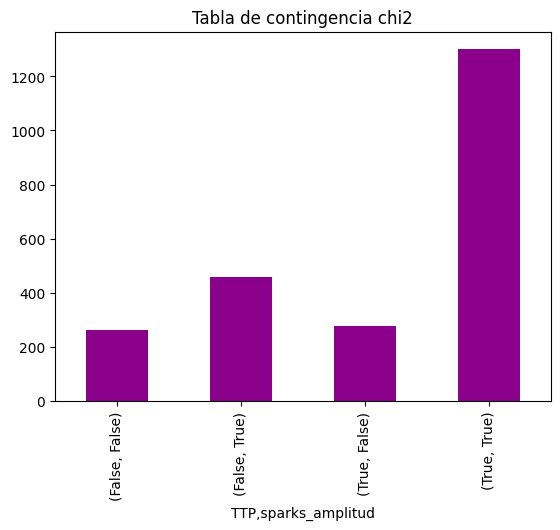

In [40]:
##CHI CUADRADO##

import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a = (df['TTP'] > 1) 
b = (df['sparks_amplitud'] > 0.09) 

# Create a contingency table using groupby
contingency_table = df.groupby([a, b])['flag'].count()

# Perform the chi-square test
chi2, p_value, _, _ = ss.chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Test Results:")
print(f"Chi2: {chi2}")
print(f"p-value: {p_value}")
print(contingency_table)

# Grafico de la tabla de contingencia

contingency_table.plot(kind='bar', stacked=True, color='darkmagenta')
plt.title('Tabla de contingencia chi2')
plt.show()

Chi2: Es el valor numérico que representa la diferencia entre las frecuencias observadas y las frecuencias esperadas bajo la hipótesis nula. Cuanto mayor sea este valor, mayor será la discrepancia entre los datos observados y esperados. Por lo tanto si el valor es pequeño,sugiere una buena concordancia entre las variables y no hay evidencia suficiente para rechazar la hipótesis nula(las variables no estan relacionadas). Mientras que si el valor de chi2 es grande, indica que hay una discrepancia significativa entre las frecuencias observadas y las esperadas, lo que sugiere una asociación entre las variables y proporciona evidencia para rechazar la hipótesis nula.
Un valor de p menor que el nivel de significancia establecido (generalmente 0.05) indica que hay evidencia suficiente para rechazar la hipótesis nula y concluir que hay una asociación significativa entre las variables categóricas.

Considerando que el chi2 es un valor muy bajo y el valor de p muy alto es que podemos afirmar que no hay correlacion entre el TTP y la amplitud del spark.

### Evaluar el ajuste de una recta de regresión e interpretar el coeficiente de correlación.

considerando mis muestras se aplico el test de Coeficiente de correlación de Spearman, un test no paramétrico que se utiliza para medir la relación monótona entre dos variables continuas o discretas ordinales.

El coeficiente de correlación de Spearman toma valores entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica ausencia de correlación, y 1 indica una correlación positiva perfecta. Un valor p menor que un umbral de significancia (generalmente 0.05) sugiere que la correlación observada es estadísticamente significativa.



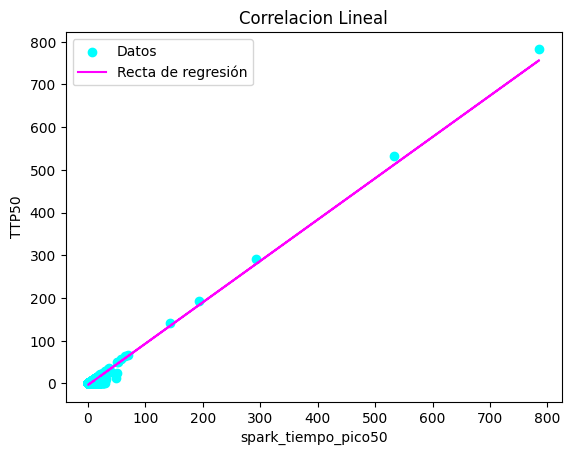

P-value: 5.036689691385479e-187
Coeficiente de correlación: 0.5560929874091511


In [41]:
##RECTA DE REGRESION## 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
#defino valores a evaluar
a = df['sparks_tiempo_pico50'].values
b = df['TTP50'].values
#
correlation, p_value = spearmanr(a, b)
#Grafico de la correlacion lineal de spearman
plt.scatter(a, b, color='cyan', label='Datos')
plt.plot(a, slope*a + intercept, color='magenta', label='Recta de regresión')
plt.xlabel('spark_tiempo_pico50')
plt.ylabel('TTP50')
plt.title('Correlacion Lineal')
plt.legend()
plt.show()
# Imprimir el p-value y el coeficiente de correlación
print("P-value:", p_value)
print("Coeficiente de correlación:", correlation)



TTP50 tiempo desde el pico hasta el 50% de la caida, en este momento de la curva pesa menos la liberacion y mas la incorporacion de Ca2+ al reticulo endoplasmatico
sparks_tiempo_pico50: lo que tarda en llegar a la mitad( caundo la intensidad aumenta hasta llegar al pico), relacionado con la velocidad de salida de Ca2+, es decir que tan rapido se abrieron canales para que salga el Ca2+

El test de Spearman nos permite decir que hay una corelacion psitiva (coeficiente de correlacion mayor a cero) entre el fenomeno de salida de Ca2+ con el de incorporacion y que esta correlacion es significativa(p-value menor a 0.05).
El porque esto sucede excede los objetivos del trabajo.